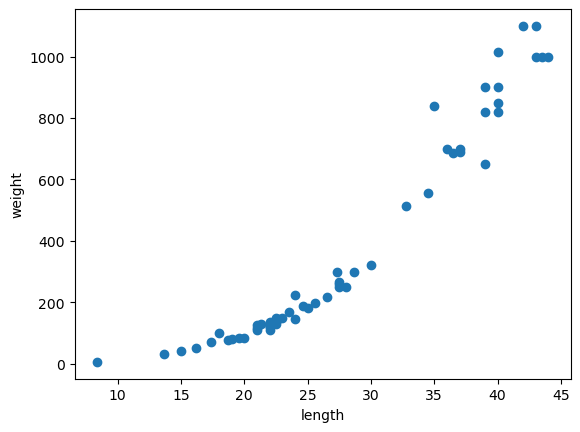

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 데이터의 산점도
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#사용가능한 2차원 배열로 바꾸기
test_array = np.array([1,2,3,4])
print(test_array.shape)
test_array = test_array.reshape(2,2)
print(test_array.shape)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(4,)
(2, 2)
(42, 1) (14, 1)


In [3]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))
#결정계수 : 1-{(타깃-예측)^2의 합/(타깃-평균)^2의 합}
#타깃-예측의 값이 작을수록 예측이 타깃에 아주 가까운 것 => 아주 좋은 정확도

from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)# 평균 절대 오차
# 예측이 타깃값과 평균적으로 얼마나 차이가 나는지 보여줌

print(knr.score(train_input, train_target))
#훈련<test => 과소적합 -> 해결 : 이웃 개수 줄이기
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))
#훈련>test & 두 값이 별로 차이 나지 않음 => 적절한 모델

0.992809406101064
19.157142857142862
0.9698823289099254
0.9804899950518966
0.9746459963987609


[1033.33333333]


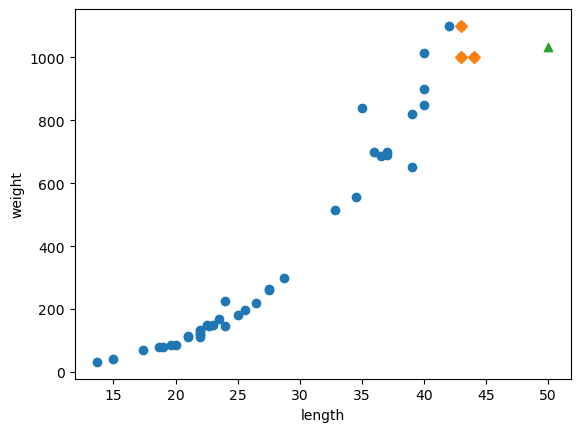

1033.3333333333333
[1033.33333333]


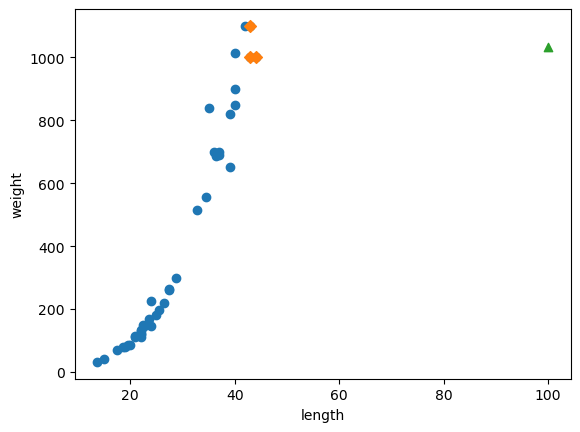

In [4]:
# 선형 회귀 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

print(knr.predict([[50]]))
#50 cm 농어의 무게 예측 : 1033 g

import matplotlib.pyplot as plt
distance, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50,1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#가장 가까운 이웃 세 개의 훈련 데이터가 모두 1000g 근처에 몰려 있어서 50cm 농어의 무게를 1033g으로 예측 -> 가장 가까운 이웃 세 개의 훈련 데이터의 농어 길이는 45cm 근방
print(np.mean(train_target[indexes]))
print(knr.predict([[100]]))
#100 cm 농어의 무게 예측 :1033 g
distance, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[1241.83860323]
[39.01714496] -709.0186449535477


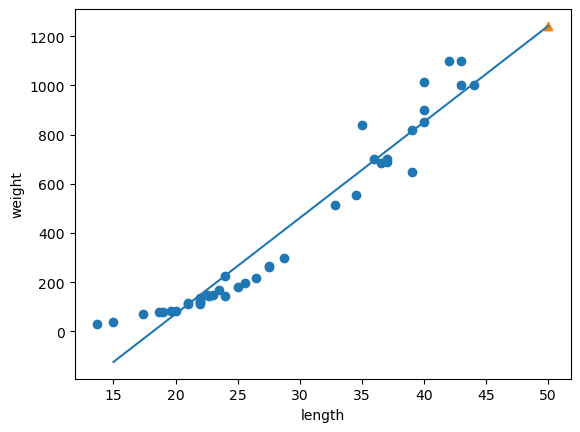

0.9398463339976041
0.8247503123313559


In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))
#50cm 농어의 무게를 1241으로 예측
print(lr.coef_, lr.intercept_)
#기울기와 절편

plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
plt.scatter(50, 1241, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#결정계수 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
#여러 문제가 있음) 무게가 음수가 나올 수 있음


(42, 2) (14, 2)
[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


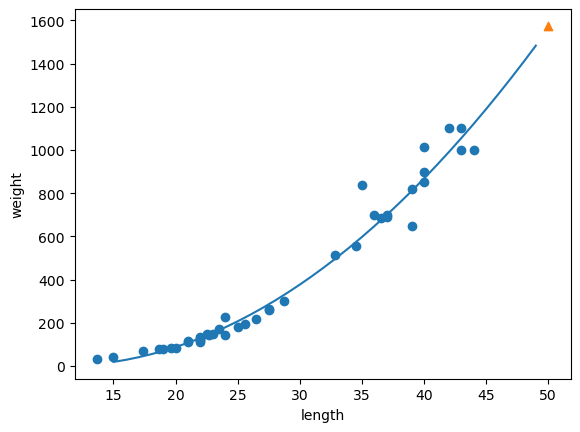

0.9706807451768623
0.9775935108325122


In [6]:
#다항 회귀
#농어의 길이와 무게에 대한 산점도가 일직선 보다는 곡선에 가까움 => 2차 방정식의 그래프를 그리기위해 길이를 제곱한 항을 훈련 세트에 추가
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
#원래 특성인 길이를 제곱하여 왼쪽 열에 추가했기 때문에 훈련 세트와 테스트 세트 모두 열이 2개로 늘어남
print(train_poly.shape, test_poly.shape)
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))
# 더 높은 값 예측
print(lr.coef_, lr.intercept_)
#무게 = 1.01 * (길이)^2 - 21.6*(길이) + 116.05

point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 -21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#결정 계수 확인
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#훈련>test : 과소적합


In [ ]:
# pandas(데이터 분석 라이브러리)
import pandas as pd
perch_full = pd.read_csv('https://bit.ly/perch_csv_data') #파일을 판다스에서 읽기) read_csv이용하여 데이터프레임 만들기
perch_full.head()                                         #head() 메서드 이용하여 처음 다섯 개 행 출력

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

#perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])  #fit(): 새롭게 만들 특성 조합을 찾음
print(poly.transform([[2,3]]))  #transform(): 실제로 데이터 변환
# 2개의 특성을 가진 샘플[2,3]이 6개의 특성을 가진 샘플[1,2,3,4,6,9]로 바뀜

poly = PolynomialFeatures(include_bias=False) #inclue_bias=False로 지정하여 특성 변환
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]


In [17]:
#train_input에 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape) #배열의 크기 확인

poly.get_feature_names_out() #9개의 특성이 각각 어떤 입력 조합으로 만들어졌는지

(42, 9)


array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [18]:
test_poly = poly.transform(test_input)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) #훈련 세트에 대한 점수
print(lr.score(test_poly, test_target)) #테스트 세트에 대한 점수

#=> 과소적합문제 해결

0.9903183436982126
0.9714559911594095


In [ ]:
# 특성 추가
poly = PolynomialFeatures(degree=5, include_bias=False) #5제곱까지 특성 만들기
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

#55개의 특성이 만들어짐

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

#특성의 개수를 크게 늘리면 선형 모델이 아주 강력해짐 -> 훈련 세트에 대해 거의 완벽하게 학습 -> 훈련 세트에 너무 과대적합 -> 테스트 세트에서는 형편없는 점수

0.9999999999976599
-144.4072001577299


In [27]:
# 규제 : 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 함 => 훈련 세트에 과대적합되지 않도록
# standardScaler(특성을 표준점수로 바꿈)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


In [28]:
# 선형 회귀에 규제 추가(릿지: 계수 제곱-더 선호-, 라쏘: 절댓값)
# fit()에서 훈련 -> score()에서 평가
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9790693977615383


In [34]:
#alpha 매개변수로 규제 강도 조절(크면-과소적합 유도, 작으면-과대적합 가능성 있음)
import matplotlib.pyplot as plt
train_score = []
test_score = []
#alpha값을 10배씩 늘려가며 릿지 회귀 모델 훈련
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

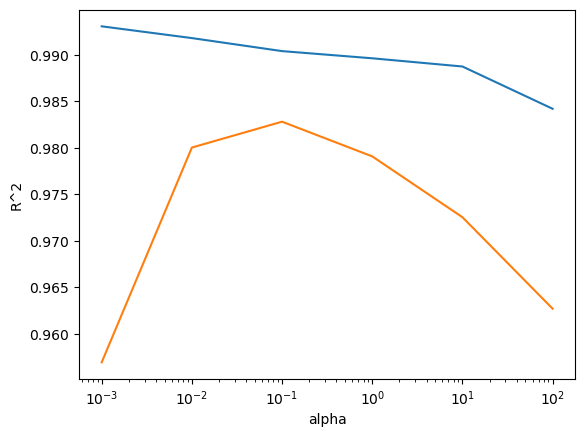

In [ ]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 0.1

In [37]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465387017


In [38]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [40]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [42]:
#alpha값을 바꾸어 가며 훈련 세트와 테스트 세트에 대한 점수 계산
train_score = []
test_score =[]
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso=Lasso(alpha=alpha, max_iter = 100000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/kdt_41/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/kdt_41/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


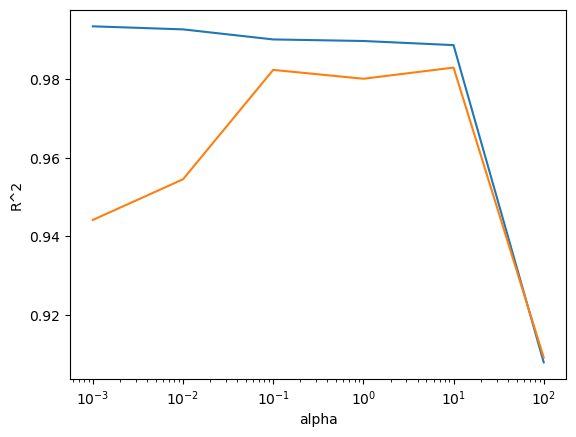

In [44]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#alpha = 10 값이 라쏘 모델에서 최적의 alpha값

In [46]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
#라쏘 모델에서 계수 값이 0인 것
#coef_속성 사용
print(np.sum(lasso.coef_ == 0))
# 계수: True = 1, False = 0 -> 라쏘 모델이 사용한 특성 = 55 - 40 = 15개

40
